In [1]:
## LIBRARIES
library(rpart)   ## FOR Decision Trees
#install.packages("rattle")
library(rattle)  ## FOR Decision Tree Vis
library(rpart.plot)
library(RColorBrewer)
#install.packages("Cairo")
library(Cairo)
#install.packages("network")
library(network)
library(ggplot2)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Warning message:
“package ‘rpart.plot’ was built under R version 4.3.1”
Warning message:
“package ‘Cairo’ was built under R version 4.3.1”
Warning message:
“package ‘network’ was built under R version 4.3.1”

‘network’ 1.18.2 (2023-12-04), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


Warning message:
“package ‘ggplot2’ was built under R version 4.3.1”


In [2]:
# reading the data
df = read.csv('classificationdata.csv')
head(df)

,datetime,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2017-01-01 00:00:00,36,1006,37.814,3,10,39.73915,-104.9847,clear
2,2017-01-01 01:00:00,36,1006,29.174,2,340,39.73915,-104.9847,not clear
3,2017-01-01 02:00:00,68,1008,28.418,1,189,39.73915,-104.9847,clear
4,2017-01-01 03:00:00,79,1008,26.924,1,210,39.73915,-104.9847,clear
5,2017-01-01 04:00:00,79,1008,25.142,1,189,39.73915,-104.9847,clear
6,2017-01-01 05:00:00,85,1007,21.524,1,180,39.73915,-104.9847,clear


In [3]:
# dropping the datetime, latitude and longitude column
df = df[- c(1, 7, 8)]
head(df)

,humidity,pressure,temperature,wind_speed,wind_direction,weather
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,36,1006,37.814,3,10,clear
2,36,1006,29.174,2,340,not clear
3,68,1008,28.418,1,189,clear
4,79,1008,26.924,1,210,clear
5,79,1008,25.142,1,189,clear
6,85,1007,21.524,1,180,clear


In [4]:
# checking whether data is balanced or not
apply(df, 2, table)  # 2 means columns

$humidity

  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24 
  9  19  29  29  41  45  79  72  86 101 119 106 104  91  94 110 106 105 109 104 
 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44 
129 129 131 148 116 127 138 122 131 122  97 111 128  87 114 111  65  91  95  78 
 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64 
122  80  71 108 112  80  73 126  61  57 111  81  48  78  99  79  54  86  68  89 
 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84 
 54  65  78  67  81  59  94  77  32  83  66  75  96  14  40 100 129  84  10  34 
 85  86  87  88  89  90  91  92  93  95  96  97  98  99 100 
 73 150 201  13   4   9   5 182 260  11   5   8   5   2 216 

$pressure

 801  802  804  805  806  807  808  809  810  811  812  813  814  815  816  817 
   4    3    9   15    6   21   29   16    5    3    3    6    5   11   16   10 
 818  819  820  821  865  880  993  994  995 

Data and label are balanced pretty well.


In [5]:
# checking the dtypes
str(df)

'data.frame':	7993 obs. of  6 variables:
 $ humidity      : num  36 36 68 79 79 85 73 85 73 53 ...
 $ pressure      : num  1006 1006 1008 1008 1008 ...
 $ temperature   : num  37.8 29.2 28.4 26.9 25.1 ...
 $ wind_speed    : num  3 2 1 1 1 1 2 3 3 3 ...
 $ wind_direction: num  10 340 189 210 189 180 240 250 260 247 ...
 $ weather       : chr  "clear" "not clear" "clear" "clear" ...


In [6]:
# converting the label (weather) to factor type
df$weather = as.factor(df$weather)
str(df)

'data.frame':	7993 obs. of  6 variables:
 $ humidity      : num  36 36 68 79 79 85 73 85 73 53 ...
 $ pressure      : num  1006 1006 1008 1008 1008 ...
 $ temperature   : num  37.8 29.2 28.4 26.9 25.1 ...
 $ wind_speed    : num  3 2 1 1 1 1 2 3 3 3 ...
 $ wind_direction: num  10 340 189 210 189 180 240 250 260 247 ...
 $ weather       : Factor w/ 2 levels "clear","not clear": 1 2 1 1 1 1 1 1 1 1 ...


In [7]:
(DataSize=nrow(df)) ## how many rows?
(TrainingSet_Size=floor(DataSize*(3/4))) ## Size for training set
(TestSet_Size = DataSize - TrainingSet_Size) ## Size for testing set

[1] 7993

[1] 5994

[1] 1999

In [8]:
# Random sample WITHOUT replacement 
set.seed(123)

# generating sample of row numbers
(MyTrainSample = sample(nrow(df),TrainingSet_Size,replace=FALSE))

# using the sample of row numbers to fetch those rows only from the dataframe
(MyTrainingSET = df[MyTrainSample,])
table(MyTrainingSET$weather)

[1] 2463 2511 2227  526 4291 2986 1842 1142 3371 5349 5364 5134 3446 4761
  [15] 6746 1627 7936 2757 5107 5211  953 4444 1017 7817 2013 5475 2888 6170
  [29] 2567 1450 5769 1790 4307 2980 1614 6737  555 5991 4469 6988 1167 2592
  [43] 2538 7789 1799  905 7081 5962 1047 7067 3004 4405 3207 3995 5344  166
  [57]  217 1314 2629 6216  588 1599 4237 4818 3937 4089 2907 4249  294  277
  [71] 5583   41 6575 6234  316 7391 6672 7284 7774 2822 2795 2504 6742 3926
  [85] 7207 1183  752 3281  374 7987 6129 2082 4612 4109 2117 6134 6015  755
  [99] 6553 5428 7446 5209 7072 1006 2585 7127 2339 1448 3952 3358 3980 4767
 [113] 6265 1134 3230 5184 5603 1934 1501 4576 3783 6211 7831 7158 1914 5967
 [127] 1109 4261 7816 1075 3146 7346 1386 2284 4706 2378 6870 4223 4044 2260
 [141]  686 3857 6078 6958 7478 5027 7022 6387  847 7281  983 4715 6023 4573
 [155] 6095  151 6810 1638 6911 2208 7559 6299 2474 1029  326 3856 7448 2837
 [169] 7735 1956 5358 5884 4093 5459  985 6183 6966  986 4233 2503 1762 1584
 [183] 4685 7251 4084 5999 2087 2244 1793 4776 7454 5726 6644 7819 1808  344
 [197] 7849 2507 2992 3092 7016  195 5981 3236 3124 4972 6678 2225 4650 2875
 [211] 2132 5643 6777 4023 3464 1326 6741 3949 4802 2667 7757 3502 2758 3833
 [225]  712 1452 4768 5370 1828 3501 3069 2446 3061  528 4055 6525 1569 6184
 [239] 6056 6666  473 6344 6098 1149 2037 2313 2823 1927 6330 7741 3324  458
 [253] 3224 4927 1078 5015 5658 6379 1313  185  413 4723 2570 1333 7222 6349
 [267] 5995 4875 1561  564  794 1415 7895 3799 1370 4256 6612 3581 2968 3129
 [281] 6601 4713  357  279 4366 7847 6790 6491 3201 2266  618 1905 6842  337
 [295] 6941 2074  539 5077 7687  956 5877 5786 3625 6868 3462 5618 7390 6815
 [309] 7005 6801 3008 1445 5177 6804 2211 2286 5793 2626 7858 7393 5509 4213
 [323] 4744 1079 1241 7777 2605 1706 6559 7302 7101  873 6832  757 6061  988
 [337] 2495 7272 2869 2879 4807 5588 1234 4445 1425 3809 7426 7786 4482 1165
 [351] 2072 7089 3071 6083 7634 5250 2213 5823 1612 5497 3853 6314 5565  710
 [365] 1258 2470 2556 7885 2112 6224 7877 6692 3035 6619 7887 6909 7511 1347
 [379] 6623 7279  791 1987 5001 1341 4903 5342 5407 5854 3657 4388 5346 5910
 [393] 1708 4393 4956 4701 6781 1835 3111 1261 6309 7842 1057   83 3468  866
 [407] 2325 7377 5119 4172 5214 7198 7385 7090 7343 6518 2371 2163 7639 6994
 [421] 2656 5478  682 7886 7082 3168 1562 6541 3814 7316  989 4052 1961 6536
 [435] 4007 5834 2641 5567 1362 6888 4339 2154 3959 6155 4721 3436  386 2451
 [449] 4557  141   31 6046 5235 7602 4190 3786 4112 3781  178 3489 3536 5532
 [463] 6321 4620 5557 5020 5698  204 3247 4019 2421 7707 2432 5242 3475 2363
 [477]  259 4590 5985 5880 5409 7216 1355 7268 3064 5228 1325 4106 4266 3352
 [491] 4071 2450 1233 3540 1851 1673 7477 3467 4204 4104 4722 4357 2589 7474
 [505] 6470 5194 2330 1609 3339 6007 5382 1760 7526 5843 5339 6840 3424  667
 [519] 5086 5239 4548  856 1948 5699 2670 1960  646 1060 3127 3562 1264 4987
 [533] 1656 1886 1328 7809 3082  665 3494 2035 5732 3177 4889 5508 7992 1204
 [547] 4374  241 4120 6823 1727 2085 2734 6710 5423 1743 3984 6163 5791  378
 [561]  549 5735 1268 2096 7356 4030 6608 4489 3211 7985 1395 4766 5309  311
 [575] 6333 1442 5502 2086 1108  319 6830 2894 1862 1666  120 2760 1557 6585
 [589] 7367 3571  599 7934 5435 6858 6821 6225 5175  134 4520 2804 6150 3200
 [603]  879  668 5920   49 5596 3311  193 7976 6603 4399 7564 7042 2238 3696
 [617]  191 6590 6263 3699 5747 7227 4913 3975 2109 1446 3180 1316 1397 5655
 [631] 7576 2978 5720 3716 5046 5533 4794 7888 5883 5323  758 5089 3318 1464
 [645] 2995 6834  251 2608  643 2593  990 2210 5442 2624 6312 3514 6932 6222
 [659] 7456 1517 5544  445 3043   95 3990 7533  379 1366 2269 7797  620  448
 [673]  242 7071 2862 6088 7070  407 6373 2833 1498 2747 1465 3243 3095 4314
 [687] 3556 7671   79 1531 7790 6381 4675 1831 2977 4518 4589 4826 1820 2257
 [701] 4695 3765  877 2406 5161  904 4944 7030 4546 1256 1358 2444 3802 1864
 [715] 2687 4137 3336 3769  201   52 5345 2115  680 3842  577 4553 1015 7746

,humidity,pressure,temperature,wind_speed,wind_direction,weather
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2463,41,1030,47.9186,1,231,clear
2511,50,1016,48.7040,2,170,not clear
2227,15,1008,52.7540,7,300,clear
526,12,1012,46.3460,1,91,clear
4291,22,1014,78.5300,2,150,clear
2986,50,1022,48.1820,1,227,clear
1842,15,1025,63.5360,2,120,not clear
1142,51,808,22.1522,1,232,clear
3371,60,1021,39.4160,2,197,clear



    clear not clear 
     3138      2856 

Train set looks balanced

In [9]:
## using other row numbers to fetch those rows for test set to make train and test sets disjoint
(MyTestSET <- df[-MyTrainSample,])
table(MyTestSET$weather)

,humidity,pressure,temperature,wind_speed,wind_direction,weather
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,68,1008,28.418,1,189,clear
4,79,1008,26.924,1,210,clear
7,73,1006,23.234,2,240,clear
10,53,1004,20.732,3,247,clear
11,73,1004,21.452,3,247,clear
12,73,1004,21.434,3,259,clear
14,92,1003,19.274,3,259,clear
15,92,1003,18.248,2,256,not clear
19,64,1003,37.760,1,20,clear



    clear not clear 
     1023       976 

Test set looks balanced

In [10]:
# removing the labels from the test set and storing them
(TestKnownLabels <- MyTestSET$weather)
(MyTestSET <- MyTestSET[ , -which(names(MyTestSET) %in% c("weather"))])

[1] clear     clear     clear     clear     clear     clear     clear    
   [8] not clear clear     clear     clear     clear     clear     clear    
  [15] clear     clear     clear     not clear not clear not clear clear    
  [22] clear     not clear not clear not clear not clear not clear not clear
  [29] not clear not clear not clear not clear not clear not clear not clear
  [36] not clear not clear not clear not clear not clear not clear not clear
  [43] not clear not clear not clear clear     clear     not clear clear    
  [50] clear     clear     clear     clear     not clear not clear not clear
  [57] clear     clear     clear     clear     clear     not clear clear    
  [64] clear     clear     clear     clear     not clear clear     clear    
  [71] clear     clear     clear     clear     clear     clear     clear    
  [78] clear     not clear not clear clear     clear     clear     clear    
  [85] not clear not clear clear     not clear not clear not clear not clear
  [92] not clear not clear not clear not clear not clear not clear not clear
  [99] not clear not clear not clear not clear clear     not clear not clear
 [106] clear     clear     clear     clear     not clear not clear not clear
 [113] not clear clear     clear     not clear not clear not clear clear    
 [120] clear     not clear clear     clear     clear     not clear not clear
 [127] clear     not clear clear     clear     clear     clear     clear    
 [134] not clear clear     not clear not clear not clear not clear clear    
 [141] not clear not clear not clear not clear not clear not clear not clear
 [148] not clear not clear not clear not clear not clear not clear not clear
 [155] not clear not clear clear     not clear clear     not clear clear    
 [162] not clear clear     clear     clear     clear     clear     not clear
 [169] clear     clear     clear     clear     clear     clear     clear    
 [176] clear     clear     clear     clear     clear     clear     clear    
 [183] clear     clear     clear     clear     not clear clear     clear    
 [190] not clear not clear not clear not clear not clear not clear not clear
 [197] not clear not clear not clear not clear not clear not clear not clear
 [204] not clear not clear not clear not clear not clear clear     not clear
 [211] clear     clear     clear     not clear not clear not clear clear    
 [218] clear     clear     clear     clear     clear     not clear clear    
 [225] not clear clear     clear     clear     not clear clear     clear    
 [232] not clear not clear not clear clear     clear     clear     clear    
 [239] clear     not clear clear     not clear clear     clear     clear    
 [246] clear     not clear not clear not clear not clear not clear not clear
 [253] not clear not clear clear     clear     clear     not clear not clear
 [260] not clear not clear clear     clear     clear     not clear clear    
 [267] clear     clear     clear     clear     clear     clear     clear    
 [274] clear     clear     clear     clear     clear     not clear not clear
 [281] not clear not clear clear     not clear not clear clear     not clear
 [288] not clear clear     not clear not clear not clear not clear clear    
 [295] clear     clear     clear     not clear not clear not clear not clear
 [302] not clear clear     clear     clear     clear     not clear not clear
 [309] clear     not clear not clear not clear not clear clear     clear    
 [316] clear     not clear not clear not clear not clear not clear not clear
 [323] not clear not clear not clear not clear clear     clear     not clear
 [330] not clear clear     clear     clear     not clear clear     clear    
 [337] clear     clear     clear     clear     clear     not clear not clear
 [344] not clear not clear not clear clear     not clear not clear not clear
 [351] not clear not clear not clear not clear not clear not clear clear    
 [358] not clear not clear not clear not clear not clear clear     not clear

,humidity,pressure,temperature,wind_speed,wind_direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,68,1008,28.418,1,189
4,79,1008,26.924,1,210
7,73,1006,23.234,2,240
10,53,1004,20.732,3,247
11,73,1004,21.452,3,247
12,73,1004,21.434,3,259
14,92,1003,19.274,3,259
15,92,1003,18.248,2,256
19,64,1003,37.760,1,20


In [11]:
str(MyTrainingSET)

'data.frame':	5994 obs. of  6 variables:
 $ humidity      : num  41 50 15 12 22 50 15 51 60 49 ...
 $ pressure      : num  1030 1016 1008 1012 1014 ...
 $ temperature   : num  47.9 48.7 52.8 46.3 78.5 ...
 $ wind_speed    : num  1 2 7 1 2 1 2 1 2 0 ...
 $ wind_direction: num  231 170 300 91 150 227 120 232 197 119 ...
 $ weather       : Factor w/ 2 levels "clear","not clear": 1 2 1 1 1 1 2 1 1 2 ...


In [89]:
cat("Train set (with labels):")
head(MyTrainingSET)
cat("Test set (without labels):")
head(MyTestSET)
cat("Test set labels:")
head(TestKnownLabels)

Train set (with labels):

,humidity,pressure,temperature,wind_speed,wind_direction,weather
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2463,41,1030,47.9186,1,231,clear
2511,50,1016,48.7040,2,170,not clear
2227,15,1008,52.7540,7,300,clear
526,12,1012,46.3460,1,91,clear
4291,22,1014,78.5300,2,150,clear
2986,50,1022,48.1820,1,227,clear


Test set (without labels):

,humidity,pressure,temperature,wind_speed,wind_direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,68,1008,28.418,1,189
4,79,1008,26.924,1,210
7,73,1006,23.234,2,240
10,53,1004,20.732,3,247
11,73,1004,21.452,3,247
12,73,1004,21.434,3,259


Test set labels:

[1] clear clear clear clear clear clear
Levels: clear not clear

In [99]:
cat("Train Data balance:")
table(MyTrainingSET$weather)
cat("\nTest Data balance:")
table(TestKnownLabels)

Train Data balance:


    clear not clear 
     3138      2856 


Test Data balance:


TestKnownLabels
    clear not clear 
     1023       976 

In [12]:
# creating DT model on training set using rpart(). method = classification.

# For classification tasks, the default split criterion in rpart is the Gini impurity, which is used to measure the impurity of a node. The algorithm chooses the split that maximally reduces the Gini impurity across the resulting child nodes.

# For regression tasks, the default split criterion is based on the reduction of the sum of squared errors (SSE) or mean squared error (MSE). The algorithm selects the split that minimizes the SSE or MSE across the resulting child nodes.

MyDT <- rpart( weather ~ ., MyTrainingSET, method = "class" )
summary(MyDT)

Call:
rpart(formula = weather ~ ., data = MyTrainingSET, method = "class")
  n= 5994 

          CP nsplit rel error    xerror       xstd
1 0.22619048      0 1.0000000 1.0000000 0.01353908
2 0.03781513      1 0.7738095 0.7748599 0.01308210
3 0.01000000      3 0.6981793 0.7086835 0.01281988

Variable importance
      humidity wind_direction    temperature 
            64             18             17 

Node number 1: 5994 observations,    complexity param=0.2261905
  predicted class=clear      expected loss=0.4764765  P(node) =1
    class counts:  3138  2856
   probabilities: 0.524 0.476 
  left son=2 (4660 obs) right son=3 (1334 obs)
  Primary splits:
      humidity       < 74.5   to the left,  improve=242.18340, (0 missing)
      wind_direction < 51.5   to the right, improve=118.82350, (0 missing)
      temperature    < 56.363 to the right, improve= 76.87733, (0 missing)
      wind_speed     < 3.5    to the left,  improve= 45.12091, (0 missing)
      pressure       < 1012.5 to the lef

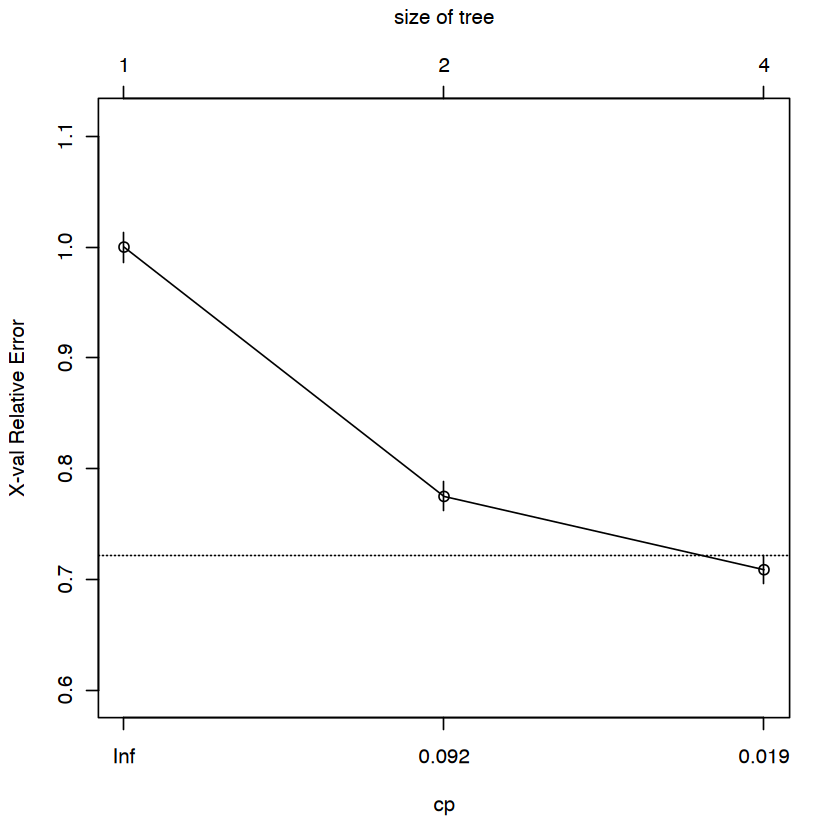

In [14]:
# cp plot:
# The x-axis represents the complexity parameter (CP) values. Each point on the x-axis corresponds to a particular level of complexity parameter.
# The y-axis represents the cross-validated error rate associated with each complexity parameter value.
# Look for the CP value associated with the minimum cross-validated error rate in the plot. This CP value indicates the point at which the model achieves the best balance between bias and variance.
# Select a slightly larger CP value than the one associated with the minimum error rate. Choosing a slightly larger CP value helps ensure that the model is pruned enough to avoid overfitting while still maintaining good predictive performance.
# the goal is to choose a CP value that results in a decision tree model with sufficient pruning to avoid overfitting, while still retaining good predictive performance on new data.

# CP: Complexity parameter values.
# nsplit: Number of splits in the tree.
# rel error: Relative error, which is the error rate relative to the root node (1.000 represents the error rate at the root node).
# xerror: Cross-validated error rate, which estimates the error rate of the tree on unseen data using cross-validation.
# xstd: Standard error of the cross-validated error rate.

plotcp(MyDT) 

In [16]:
# The small cp the larger the tree if cp is too small you have overfitting. thats why choosing cp as 0.092
MyDT2 <- rpart( weather ~ ., MyTrainingSET, cp = 0.092, method = "class" )
summary(MyDT2)

Call:
rpart(formula = weather ~ ., data = MyTrainingSET, method = "class", 
    cp = 0.092)
  n= 5994 

         CP nsplit rel error    xerror       xstd
1 0.2261905      0 1.0000000 1.0000000 0.01353908
2 0.0920000      1 0.7738095 0.7766106 0.01308821

Variable importance
   humidity temperature 
         95           5 

Node number 1: 5994 observations,    complexity param=0.2261905
  predicted class=clear      expected loss=0.4764765  P(node) =1
    class counts:  3138  2856
   probabilities: 0.524 0.476 
  left son=2 (4660 obs) right son=3 (1334 obs)
  Primary splits:
      humidity       < 74.5   to the left,  improve=242.18340, (0 missing)
      wind_direction < 51.5   to the right, improve=118.82350, (0 missing)
      temperature    < 56.363 to the right, improve= 76.87733, (0 missing)
      wind_speed     < 3.5    to the left,  improve= 45.12091, (0 missing)
      pressure       < 1012.5 to the left,  improve=  9.51205, (0 missing)
  Surrogate splits:
      temperature < 31.3

In [68]:
# The small cp the larger the tree if cp is too small you have overfitting. thats why choosing cp as 0.092
MyDT3 <- rpart( weather ~ ., MyTrainingSET,cp = 0.092, , parms = list(split="information"), method = "class" )
summary(MyDT3)

Call:
rpart(formula = weather ~ ., data = MyTrainingSET, method = "class", 
    parms = list(split = "information"), cp = 0.092)
  n= 5994 

         CP nsplit rel error    xerror       xstd
1 0.2261905      0 1.0000000 1.0000000 0.01353908
2 0.0920000      1 0.7738095 0.7783613 0.01309427

Variable importance
   humidity temperature 
         95           5 

Node number 1: 5994 observations,    complexity param=0.2261905
  predicted class=clear      expected loss=0.4764765  P(node) =1
    class counts:  3138  2856
   probabilities: 0.524 0.476 
  left son=2 (4660 obs) right son=3 (1334 obs)
  Primary splits:
      humidity       < 74.5   to the left,  improve=249.57300, (0 missing)
      wind_direction < 51.5   to the right, improve=121.63230, (0 missing)
      temperature    < 56.363 to the right, improve= 77.44717, (0 missing)
      wind_speed     < 3.5    to the left,  improve= 45.27463, (0 missing)
      pressure       < 805.5  to the right, improve= 10.10117, (0 missing)
  Surro

In [69]:
# variable.importance is a named numeric vector giving the importance of each variable.
#Only present if there are any splits.
MyDT$variable.importance

humidity wind_direction    temperature       pressure     wind_speed 
    255.154103      71.350512      66.745819       1.549288       1.063799

In [70]:
MyDT2$variable.importance

humidity temperature    pressure 
242.1833755  11.9820860   0.1815468

In [71]:
MyDT3$variable.importance

humidity temperature    pressure 
249.5729706  12.3476882   0.1870862

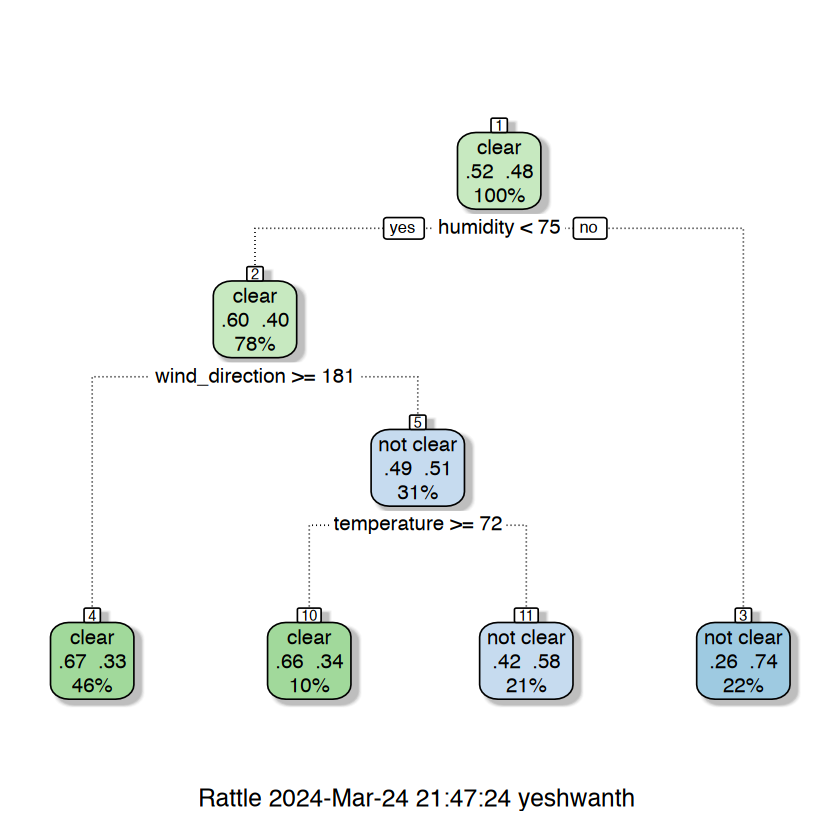

In [58]:
rattle::fancyRpartPlot(MyDT)

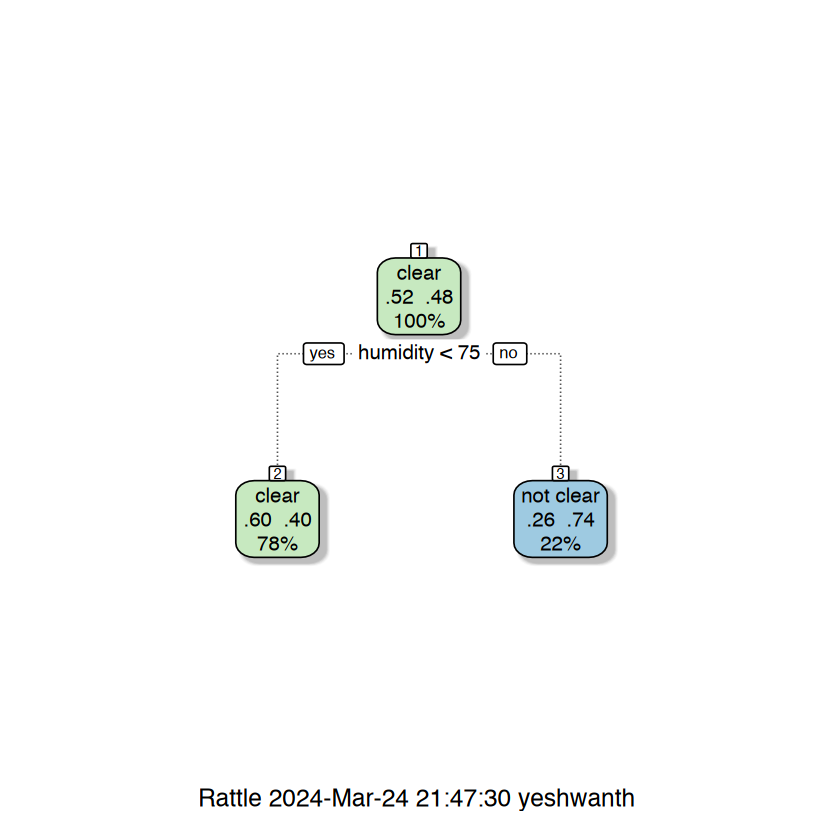

In [60]:
rattle::fancyRpartPlot(MyDT2)

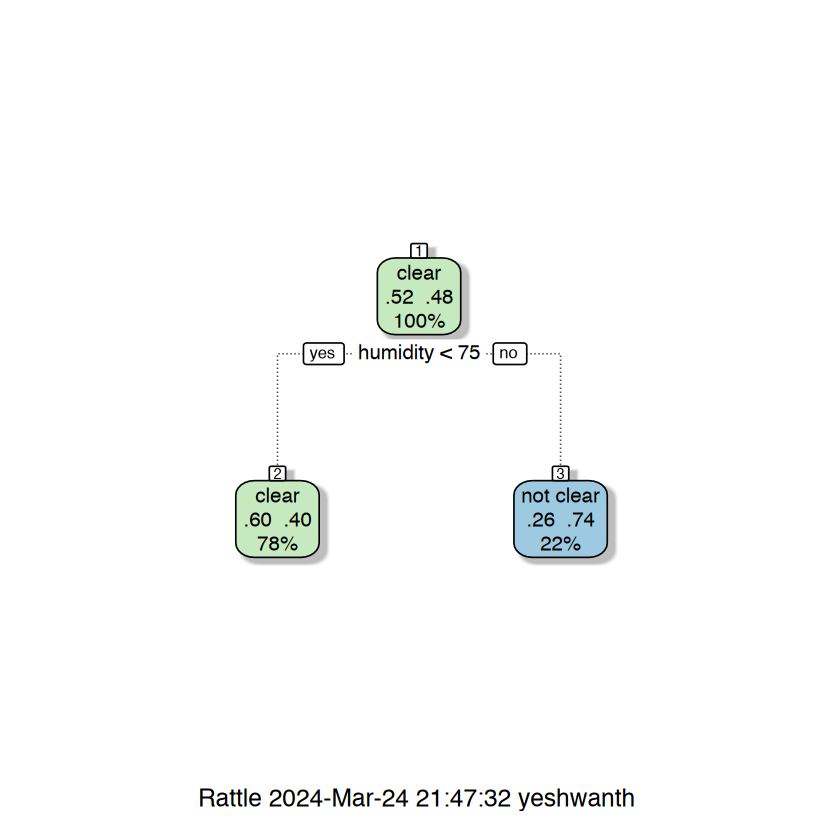

In [61]:
rattle::fancyRpartPlot(MyDT3)

In [62]:
# making predictions on test data
MyDT_pred <- predict(MyDT, MyTestSET, type = "class")
# printing confusion matrix
caret::confusionMatrix(MyDT_pred, TestKnownLabels)

Confusion Matrix and Statistics

           Reference
Prediction  clear not clear
  clear       719       336
  not clear   304       640
                                          
               Accuracy : 0.6798          
                 95% CI : (0.6589, 0.7003)
    No Information Rate : 0.5118          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.3588          
                                          
 Mcnemar's Test P-Value : 0.2204          
                                          
            Sensitivity : 0.7028          
            Specificity : 0.6557          
         Pos Pred Value : 0.6815          
         Neg Pred Value : 0.6780          
             Prevalence : 0.5118          
         Detection Rate : 0.3597          
   Detection Prevalence : 0.5278          
      Balanced Accuracy : 0.6793          
                                          
       'Positive' Class : clear           
  

In [63]:
# making predictions on test data
MyDT_pred2 <- predict(MyDT2, MyTestSET, type = "class")
# printing confusion matrix
caret::confusionMatrix(MyDT_pred2, TestKnownLabels)

Confusion Matrix and Statistics

           Reference
Prediction  clear not clear
  clear       920       621
  not clear   103       355
                                          
               Accuracy : 0.6378          
                 95% CI : (0.6163, 0.6589)
    No Information Rate : 0.5118          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2663          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8993          
            Specificity : 0.3637          
         Pos Pred Value : 0.5970          
         Neg Pred Value : 0.7751          
             Prevalence : 0.5118          
         Detection Rate : 0.4602          
   Detection Prevalence : 0.7709          
      Balanced Accuracy : 0.6315          
                                          
       'Positive' Class : clear           
  

In [64]:
# making predictions on test data
MyDT_pred3 <- predict(MyDT3, MyTestSET, type = "class")
# printing confusion matrix
caret::confusionMatrix(MyDT_pred3, TestKnownLabels)

Confusion Matrix and Statistics

           Reference
Prediction  clear not clear
  clear       920       621
  not clear   103       355
                                          
               Accuracy : 0.6378          
                 95% CI : (0.6163, 0.6589)
    No Information Rate : 0.5118          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2663          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8993          
            Specificity : 0.3637          
         Pos Pred Value : 0.5970          
         Neg Pred Value : 0.7751          
             Prevalence : 0.5118          
         Detection Rate : 0.4602          
   Detection Prevalence : 0.7709          
      Balanced Accuracy : 0.6315          
                                          
       'Positive' Class : clear           
  

In [72]:
# confusion matrix
cm1 <- table(MyDT_pred, TestKnownLabels)
cat("Confusion Matrix 1: \n\n")
print(cm1)

Confusion Matrix 1: 

           TestKnownLabels
MyDT_pred   clear not clear
  clear       719       336
  not clear   304       640


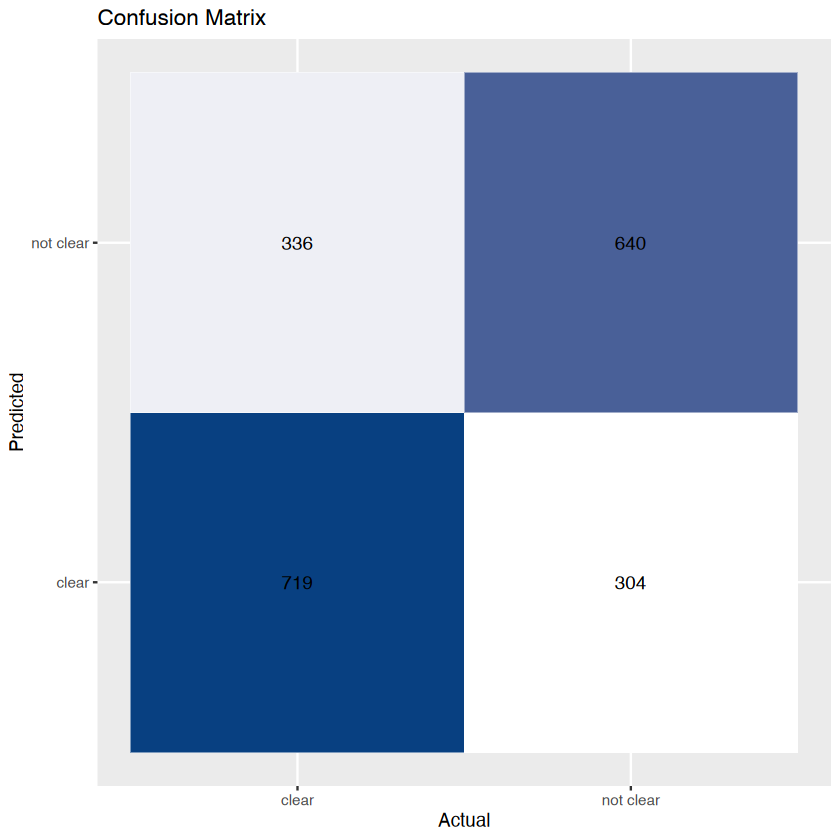

In [74]:
cm_df1 <- as.data.frame(cm1)

# Plot heatmap using ggplot2
ggplot(cm_df1, aes(x = MyDT_pred, y = TestKnownLabels, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq)) +
  scale_fill_gradient(low = "white", high = "#084081", guide = 'none') +
  labs(x = "Actual", y = "Predicted", title = "Confusion Matrix")

In [75]:
# confusion matrix
cm2 <- table(MyDT_pred2, TestKnownLabels)
cat("Confusion Matrix 2: \n\n")
print(cm2)

Confusion Matrix 2: 

           TestKnownLabels
MyDT_pred2  clear not clear
  clear       920       621
  not clear   103       355


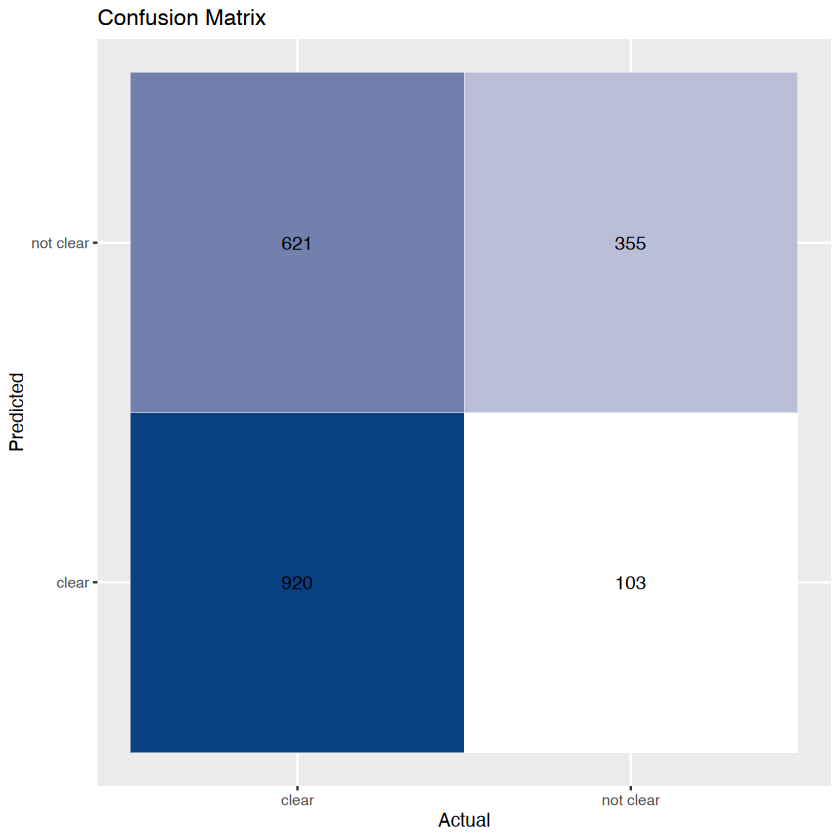

In [76]:
cm_df2 <- as.data.frame(cm2)

# Plot heatmap using ggplot2
ggplot(cm_df2, aes(x = MyDT_pred2, y = TestKnownLabels, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq)) +
  scale_fill_gradient(low = "white", high = "#084081", guide = 'none') +
  labs(x = "Actual", y = "Predicted", title = "Confusion Matrix")

In [79]:
# confusion matrix
cm3 <- table(MyDT_pred3, TestKnownLabels)
cat("Confusion Matrix 3: \n\n")
print(cm3)

Confusion Matrix 3: 

           TestKnownLabels
MyDT_pred3  clear not clear
  clear       920       621
  not clear   103       355


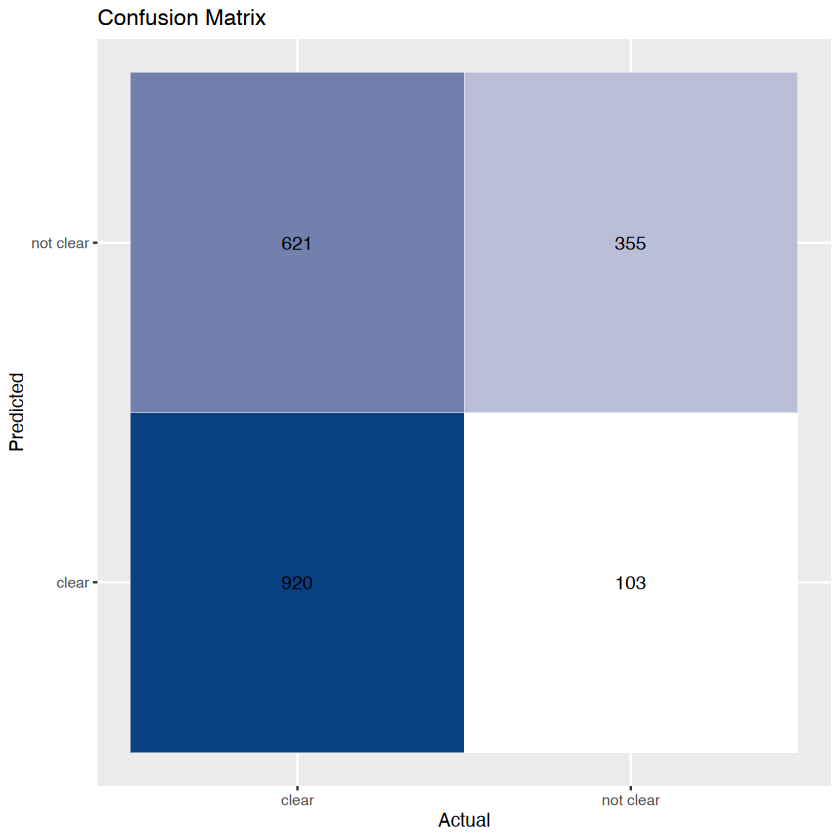

In [80]:
cm_df3 <- as.data.frame(cm3)

# Plot heatmap using ggplot2
ggplot(cm_df3, aes(x = MyDT_pred3, y = TestKnownLabels, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq)) +
  scale_fill_gradient(low = "white", high = "#084081", guide = 'none') +
  labs(x = "Actual", y = "Predicted", title = "Confusion Matrix")